
# ADWIN: Adaptive windowing algorithm



ADWIN is designed to deal with data that is constantly changing over time. Handeling this real-time data requires the implementation of techniques to be accurate and efficient.

ADWIN generates a window of variable size that grows when the data does not change and shrinks when the data change abruptly. Hence, the algorithm provides more accuracy for time slots when the data is constant and adaptation when there is evident changes.


## Dependencies

Used Libraries:

* Numpy
* Math
* Matplotlib

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Input: Confidence value and sequence

As input the algorithm takes a sequence of random values generated from a distribution. In this case, a normal distribution with ***mu*** average and ***sigma*** deviation was used.

The algorithm also takes as input the desired confidence. Default ***confidence = 0.95***

In [0]:
confidence = 0.95
mu, sigma = 1, 0.8
seq = sigma * np.random.randn(50) + mu
# seq = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

## Functions


Three functions are implemented:
* ***average***: Calcualtes the average of a given list.
* ***harmonic_mean***: Calculate the harmonic mean given two values.
* ***e_cut***: Calculates the limit threshold that determines when two subwindows are anough distinct.

In [0]:
def average(l):
  return sum(l) / len(l)

def harmonic_mean(a, b):
  return 1/((1/a) + (1/b))

def e_cut(m, n, confidence):
  return math.sqrt((1/(2*m)) * math.log(4 * n / confidence))

### ADWIN implementation

*texto en cursiva*

1. The window ***w*** is initialized as a list with the first element of the sequence. The lists that store the average of the window values and the size of the windows are also initialized with the corresponding values.

2. New element of the sequence is added to the window.

3. The window is subdivided in two subwindows W1 and W0. Initially W1 contains all elements. In every iteration the oldest element in W1 is trasnfered to W0.

4. The ***e_cut*** is calculated for every subdivision.

5. If the absolute value of the average of the differences of both subwindows is higher than the threshold ***e_cut*** the older subwindow is dropped.

In [0]:
w = []
avg = []
size_w = []

w.append(seq[0])
size_w.append(len(w))
avg.append(w[0])

for i in range(1, len(seq)):
  w.append(seq[i])
  n = len(w)
  for j in range(1, len(w)):
    w0 = w[:j]
    w1 = w[j:]
    m = harmonic_mean(len(w0), len(w1))
    e_c = e_cut(m, n, confidence)
    if abs(average(w0) - average(w1)) >= e_c:
      w = w1
      break
  avg.append(average(w))
  size_w.append(len(w))

## Plots

### Plot 1: Sequence

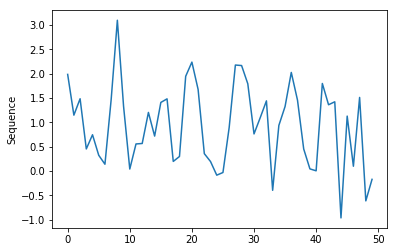

In [93]:
plt.plot(seq)
plt.ylabel('Sequence')
plt.show()

### Plot 2: Window size

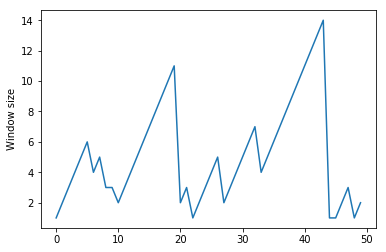

In [94]:
plt.plot(size_w)
plt.ylabel('Window size')
plt.show()

###Plot 3: Average of values within the window

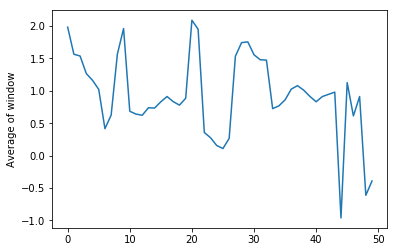

In [95]:
plt.plot(avg)
plt.ylabel('Average of window')
plt.show()